Sympy-galerija

Za svako od dolje navedenih 6 područja prikažite jedan primjer koji po Vašem mišljenju dobro pokazuje mogućnosti Sympyja na tom području. Idealno, svaki primjer bi trebao biti naslov (naziv područja), jedna tekstna ćelija (opis vlastitim riječima, ili tekst zadatka) i jedna ćelija s kodom, ali može biti i opširnije. Moja je zamisao da mogućnosti budu pozitivne (nešto što Vas je impresioniralo, nešto što sami niste znali, nešto što alati poput photomatha ili Wolfram Alphe ne znaju,...) ali ako baš ne volite Sympy, smiju biti i negativni (nešto što je krivo riješio, nešto što ne zna riješiti a smatrate da bi trebao znati, nešto što jednostavniji sustavi poput džepnih kalkulatora znaju bolje prikazati ili riješiti,...).

Primjeri ne moraju biti veliki: vjerujem da će mnogi biti u jednoj liniji, iako će neki (vjerojatno geometrija npr.) zahtijevati malo kompliciraniji setup. Svako područje s dovoljno impresivnim primjerom (ili kontraprimjerom) nosi 0.5p. Probajte da ne bude sva impresivnost samo u veličini problema (tipa, determinanta matrice 100×100 ; ) - imajte na umu da je moja mašina skoro sigurno slabija od Vaše. :-o

   1 (re)prezentacija simboličkih izraza: obuhvaća konverziju u LaTeX, DOT (Graphviz), pprint, ili transformacije izraza koje se automatski izvode pri njihovom pretvaranju u simboličku reprezentaciju

  2  linearna algebra, (simbolički) matrični/vektorski račun (dobar primjer je ono simboličko potenciranje matrice s kraja bilježnice s "predavanja", ali naravno, ne možete koristiti baš taj primjer: )

   3 diferencijalni i integralni račun: neki težak integral, (parcijalna) diferencijalna jednadžba (možda s početnim uvjetom), implicitno zadane funkcije, limesi koji se ne mogu riješiti L'Hôpitalom,...

  4  geometrija (ovo područje nismo baš obrađivali, ali možete vidjeti dokumentaciju na https://docs.sympy.org/latest/modules/geometry/index.html) - za ideje/zadatke možete posjetiti https://web.math.pmf.unizg.hr/~cerin/

  5  logika i zaključivanje (ask / assumptions / refine, upiti o svojstvima matematičkih objekata)

  6  algebarske manipulacije (pozitivni primjer će vjerojatno biti neki impresivni .simplify ili .factor, možda expand_func; naravno, negativni primjer može biti bilo što: )

   7 Jedno od gornjih šest područja možete zamijeniti područjem po Vašoj želji (ne mora uopće biti s popisa), ali ako bude područje koje već jest na popisu, primjer bi trebao biti suštinski drugačiji od onog koji ste već iskoristili za to područje (dakle, ne tipa "ista funkcija s drugim brojevima"). Svakako napišite ako/gdje koristite ovaj joker.



In [2]:
import sympy as sp
sp.init_printing()

1. (re)prezentacija simboličkih izraza: obuhvaća konverziju u LaTeX, DOT (Graphviz), pprint, ili transformacije izraza koje se automatski izvode pri njihovom pretvaranju u simboličku reprezentaciju

--convertiranje u druge programske jezike

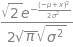

In [60]:
sigma, mi = sp.Symbol('sigma'), sp.Symbol('mu')
stnormal=(sp.sqrt((2*sp.pi*sigma**2)))**(-1)*sp.exp(-(x-mi)**2/(2*sigma**2))
stnormal

In [61]:
print('Ispis u C-u:', sp.ccode(stnormal))

Ispis u C-u: (1.0/2.0)*M_SQRT2*exp(-1.0/2.0*pow(-mu + x, 2)/pow(sigma, 2))/(sqrt(M_PI)*sqrt(pow(sigma, 2)))


In [54]:
print('Ispis u C++-u:', sp.cxxcode(stnormal))

Ispis u C++-u: (1.0/2.0)*M_SQRT2*std::exp(-1.0/2.0*std::pow(-mu + x, 2)/std::pow(sigma, 2))/(std::sqrt(M_PI)*std::sqrt(std::pow(sigma, 2)))


In [55]:
print('Ispis u Octave-u:', sp.octave_code(stnormal))

Ispis u Octave-u: sqrt(2)*exp(-(-mu + x).^2./(2*sigma.^2))./(2*sqrt(pi)*sqrt(sigma.^2))


In [56]:
print('Ispis u Octave-u:', sp.jscode(stnormal))

Ispis u Octave-u: (1/2)*Math.sqrt(2)*Math.exp(-1/2*Math.pow(-mu + x, 2)/Math.pow(sigma, 2))/(Math.sqrt(Math.PI)*Math.sqrt(Math.pow(sigma, 2)))


2. linearna algebra, (simbolički) matrični/vektorski račun (dobar primjer je ono simboličko potenciranje matrice s kraja bilježnice s "predavanja", ali naravno, ne možete koristiti baš taj primjer: )

--računanje jacobijana

In [106]:
from sympy.abc import x, y
a=sp.Matrix([sp.ln(sp.Abs(sp.sinh(x))),sp.tan(sp.exp(sp.floor(sp.asech(y))))])
a

Matrix([
[        log(Abs(sinh(x)))],
[tan(exp(floor(asech(y))))]])

In [107]:
a.jacobian([x,y])

Matrix([
[((sin(im(x))*sinh(re(x))*Derivative(re(x), x) + cos(im(x))*cosh(re(x))*Derivative(im(x), x))*sin(im(x))*cosh(re(x)) + (-sin(im(x))*sinh(re(x))*Derivative(im(x), x) + cos(im(x))*cosh(re(x))*Derivative(re(x), x))*cos(im(x))*sinh(re(x)))*sign(sinh(x))/(sinh(x)*Abs(sinh(x))),                                                                                                                                  0],
[                                                                                                                                                                                                                                                                              0, -(tan(exp(floor(asech(y))))**2 + 1)*exp(floor(asech(y)))*Subs(Derivative(floor(_xi_1), _xi_1), _xi_1, asech(y))/(y*sqrt(1 - y**2))]])

3. diferencijalni i integralni račun: neki težak integral, (parcijalna) diferencijalna jednadžba (možda s početnim uvjetom), implicitno zadane funkcije, limesi koji se ne mogu riješiti L'Hôpitalom,...

In [10]:
from sympy.abc import x, y, z

integral = sp.Integral(x**2+y**2+z**2 , (y,-1*sp.sqrt(x*(2-x)) , sp.sqrt(x*(2-x))), (z,0,2), (x,0,2))
integral.doit()

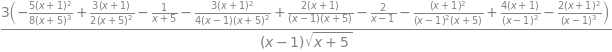

In [16]:
#kolokvij ma2 2016
derivacija = sp.Derivative((x+1)**2/(x-1)/sp.sqrt(x+5),  x, 3)
derivacija.doit()

In [19]:
#n ta derivacija

funkcija = sp.sin(x**2-2*x+2)

n = sp.symbols('n', positive=True)
derivacija = sp.Derivative(funkcija,  x, n)


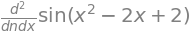

In [21]:
derivacija

4. geometrija (ovo područje nismo baš obrađivali, ali možete vidjeti dokumentaciju na https://docs.sympy.org/latest/modules/geometry/index.html) - za ideje/zadatke možete posjetiti https://web.math.pmf.unizg.hr/~cerin/

5. logika i zaključivanje (ask / assumptions / refine, upiti o svojstvima matematičkih objekata)

  6.  algebarske manipulacije (pozitivni primjer će vjerojatno biti neki impresivni .simplify ili .factor, možda expand_func; naravno, negativni primjer može biti bilo što: )
